# Predição de Risco de Crédito

Inicialmente, iremos carregar as bibliotecas necessárias para a execução do código deste notebook.

In [33]:
# Load libraries
# Import logistic regression functions
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as logit
# Import feature importance functions
#from yellowbrick.features.feature_importances import FeatureImportances
from yellowbrick.model_selection import FeatureImportances
# Import Random Forest functions
from sklearn.ensemble import RandomForestClassifier as rf
# Import Trees importance functions
from sklearn.ensemble import ExtraTreesClassifier as et
# Import scikit-learn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
# Import Pandas
import pandas as pd
# Import matplotlib
import matplotlib.pyplot as plt

Vamos fazer a leitura do arquivo com os dados. O dataset utilizado é o German Credit Data.

In [4]:
data = pd.read_csv("german_credit_data_w_target.csv", index_col=False)
data.drop(["Unnamed: 0"], axis=1, inplace=True)
data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [5]:
# Let's do some data exploration
# Describe columns
data.describe(include = "all")

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
count,1000.000000,1000,1000.000000,1000,817,606,1000.000000,1000.000000,1000,1000
unique,NaN,2,NaN,3,4,3,NaN,NaN,8,2
top,NaN,male,NaN,own,little,little,NaN,NaN,car,good
freq,NaN,690,NaN,713,603,274,NaN,NaN,337,700
mean,35.546000,NaN,1.904000,NaN,NaN,NaN,3271.258000,20.903000,NaN,NaN
std,11.375469,NaN,0.653614,NaN,NaN,NaN,2822.736876,12.058814,NaN,NaN
min,19.000000,NaN,0.000000,NaN,NaN,NaN,250.000000,4.000000,NaN,NaN
25%,27.000000,NaN,2.000000,NaN,NaN,NaN,1365.500000,12.000000,NaN,NaN
50%,33.000000,NaN,2.000000,NaN,NaN,NaN,2319.500000,18.000000,NaN,NaN
75%,42.000000,NaN,2.000000,NaN,NaN,NaN,3972.250000,24.000000,NaN,NaN


In [6]:
# Check for missing values
data.isnull().sum()
#data.isnull().replace(Null, 0)
#data.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

Verificamos a existência de valores nulos nas variáveis "Saving accounts" e "Checking account". Por enquanto, vamos remover essas duas colunas dos dados de predição.

In [7]:
# Print correlation matrix between variables
corr = data.corr()
corr

,Age,Job,Credit amount,Duration
Age,1.000000,0.015673,0.032716,-0.036136
Job,0.015673,1.000000,0.285385,0.210910
Credit amount,0.032716,0.285385,1.000000,0.624984
Duration,-0.036136,0.210910,0.624984,1.000000


Dentre as variáveis numéricas, não existem preditores colineares com correlação muito alta. Portanto, prosseguiremos com o processamento dos dados transformando as variáveis categóricas em *dummies* (**One-Hot Encoding**).

In [8]:
# Encode categorical columns (one-hot encoding)
data.drop(["Saving accounts", "Checking account"], axis=1, inplace=True)
data = pd.get_dummies(data, drop_first=True)
data.rename(columns={"Risk_good": "target"}, inplace=True)

Na sequência, separamos os dados entre treino e teste. Aqui, a proporção utilizada foi de 70% para os dados de treino e 30% para a amostra de teste. Adicionalmente, será necessária o balanceamento dos dados, para levar em conta o desbalanceamento da variável dependente (**TO DO**).

In [9]:
# Split train/test samples
train, test = train_test_split(data, test_size=0.3, random_state=0)
X_train = train.drop(["target"], axis=1)
y_train = train["target"]
X_test = test.drop(["target"], axis=1)
y_test = test["target"]

Após a separação dos dados, faremos a definição do modelo de Regressão Logística e seu treinamento, em seguida faremos a medição da acurácia do modelo em relação aos dados de teste.

In [19]:
# Define Logistic Regression model
model = logit(solver='sag', penalty='l2', dual=False, tol=1e-4, C=1, fit_intercept=True, class_weight=None, max_iter=10000, n_jobs=1) #, multi_class='multinomial'
# Train Model
model.fit(X_train, y_train)
# Model Accuracy
model.score(X_test, y_test)
#model.score(X_train, y_train)

0.7233333333333334

A acurácia, no entanto, não é a métrica mais adequada ao tratar de dados desbalanceados, a seguir são exibidas outras métricas de performance:

In [20]:
# Predict on test data
predicted = model.predict(X_test)
# Print classification report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.71      0.06      0.11        86
           1       0.72      0.99      0.84       214

    accuracy                           0.72       300
   macro avg       0.72      0.52      0.47       300
weighted avg       0.72      0.72      0.63       300



Assim como a matriz de confusão:

In [34]:
# Print confusion matrix
print(confusion_matrix(y_test, predicted))
#roc_auc_score(y_test, predicted)

[[  5  81]
 [  2 212]]


0.5243968702455988

Vamos examinar a importância das varíaveis preditoras do modelo de Regressão Logística:

/home/codespace/.conda/envs/py310/lib/python3.10/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/home/codespace/.conda/envs/py310/lib/python3.10/site-packages/yellowbrick/model_selection/importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


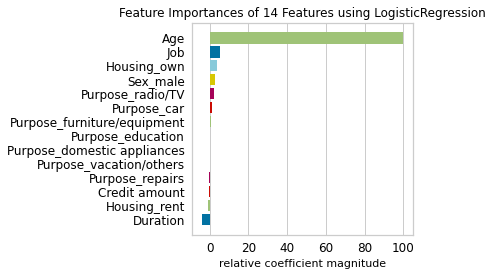

<AxesSubplot:title={'center':'Feature Importances of 14 Features using LogisticRegression'}, xlabel='relative coefficient magnitude'>

In [35]:
fig, ax = plt.subplots(figsize=(6,4))
ax.tick_params(colors='black', labelsize=12)
ax.yaxis.label.set_color('black')
ax.xaxis.label.set_color('black')
ax.set_title('Feature Importance', color='black')
feat_imp = FeatureImportances(model)#, stack=True, relative=False)
feat_imp.fit(X_train, y_train)
feat_imp.poof()